In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving Admission_predict.csv to Admission_predict.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [8]:
df=pd.read_csv('Admission_predict.csv')

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [11]:
df.head(8)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68


In [12]:
df.tail(6)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [13]:
df.dtypes
print(type(df))

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

<class 'pandas.core.frame.DataFrame'>


In [15]:
df.drop(['Serial No.'],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df.shape

(400, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [19]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [20]:
df.isnull().values.any()

False

In [21]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [22]:
df.mean()

GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a3be11850>,
      dtype=object)

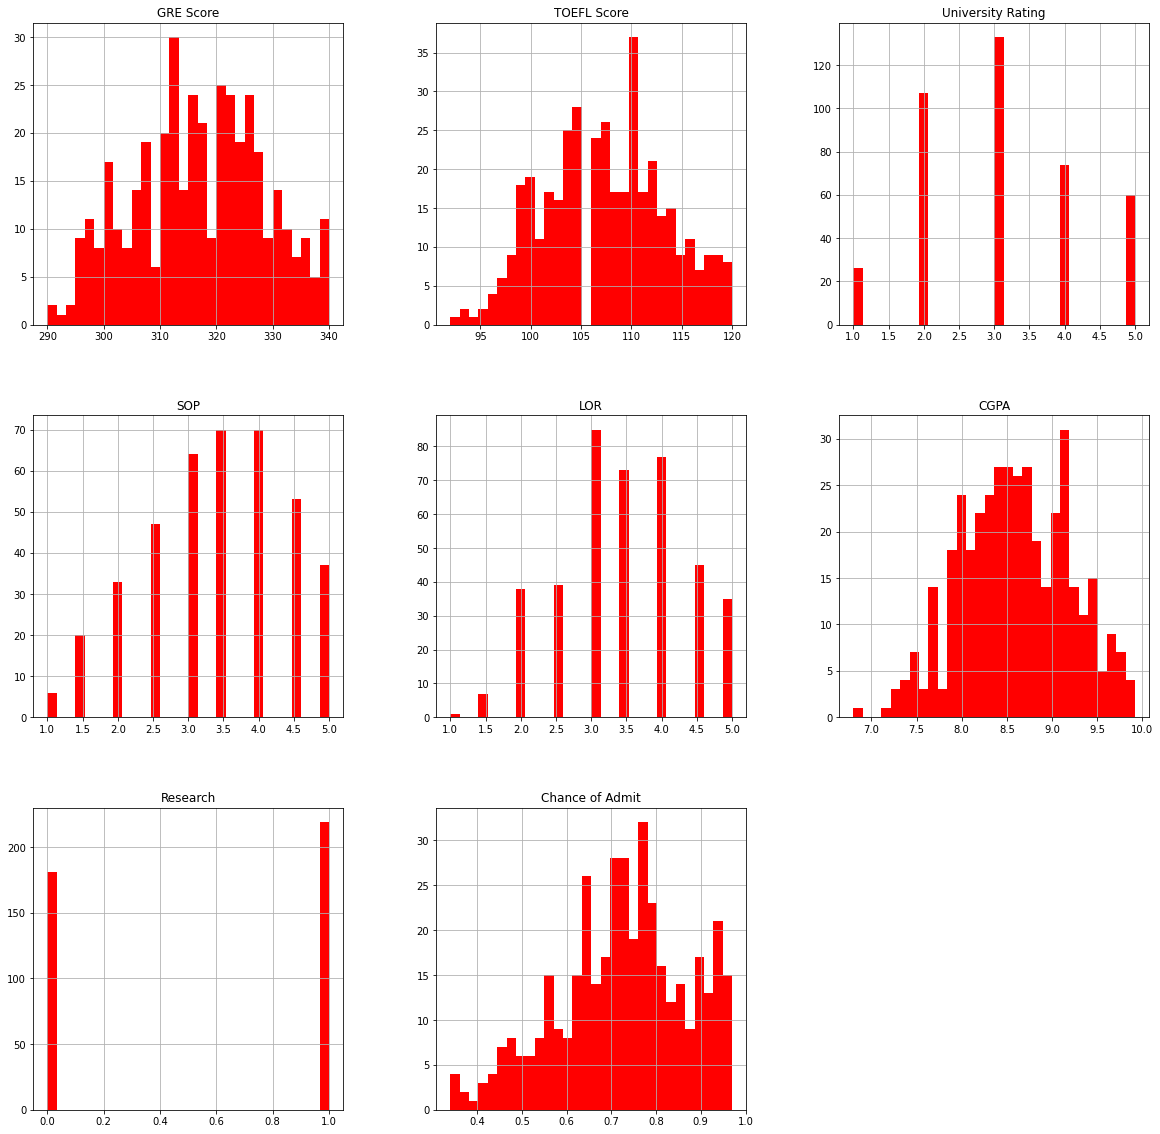

In [23]:
df.hist(bins=30,figsize=(20,20),color='r')

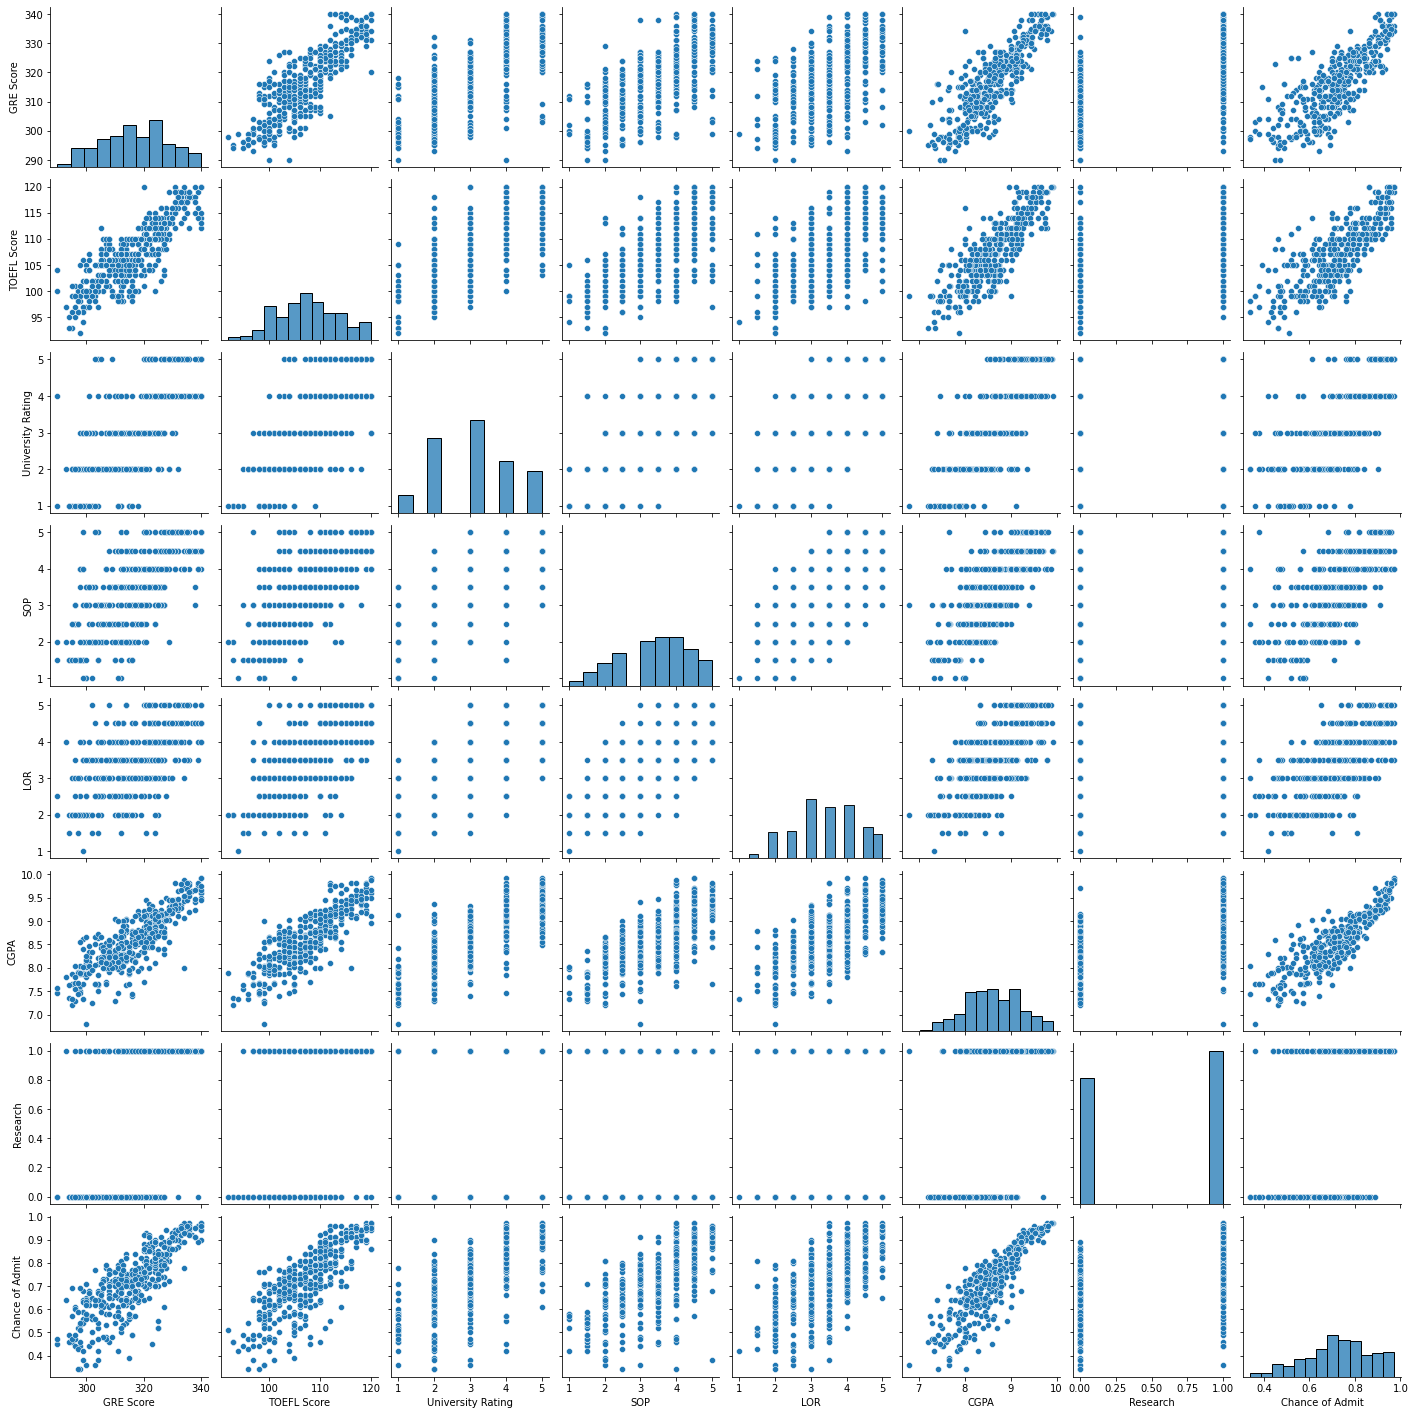

In [24]:
sns.pairplot(df)

In [25]:
sns.set(color_codes=True)

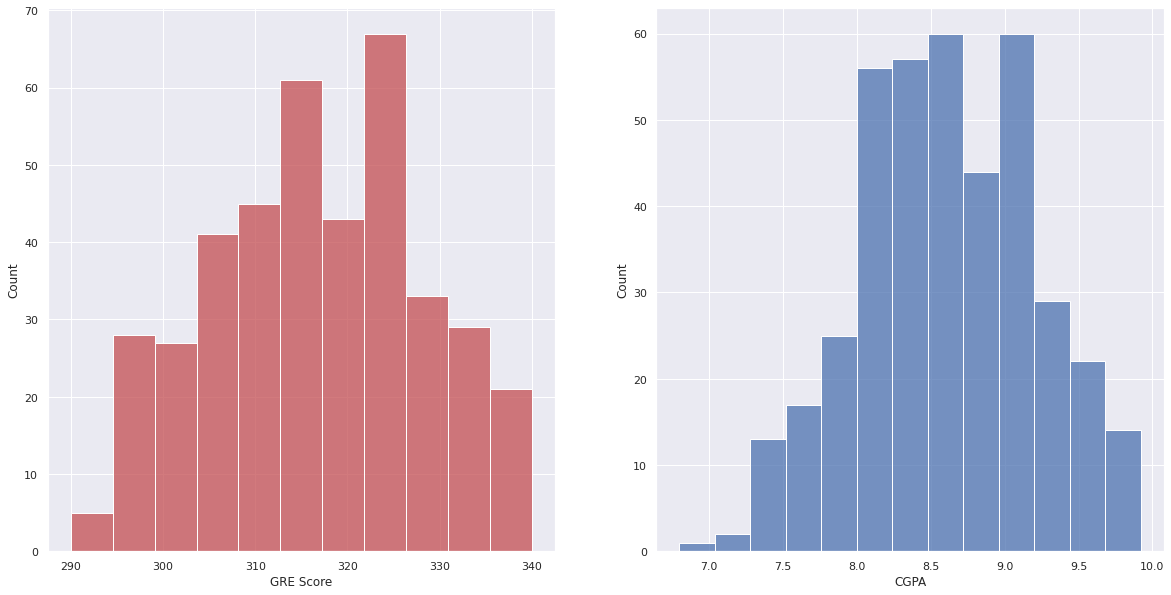

In [26]:
f,axes=plt.subplots(1,2,figsize=(20,10))
sns.histplot(df.iloc[:,0],color='r',ax=axes[0])
sns.histplot(df.iloc[:,5],color='b',ax=axes[1])

<Figure size 864x864 with 0 Axes>

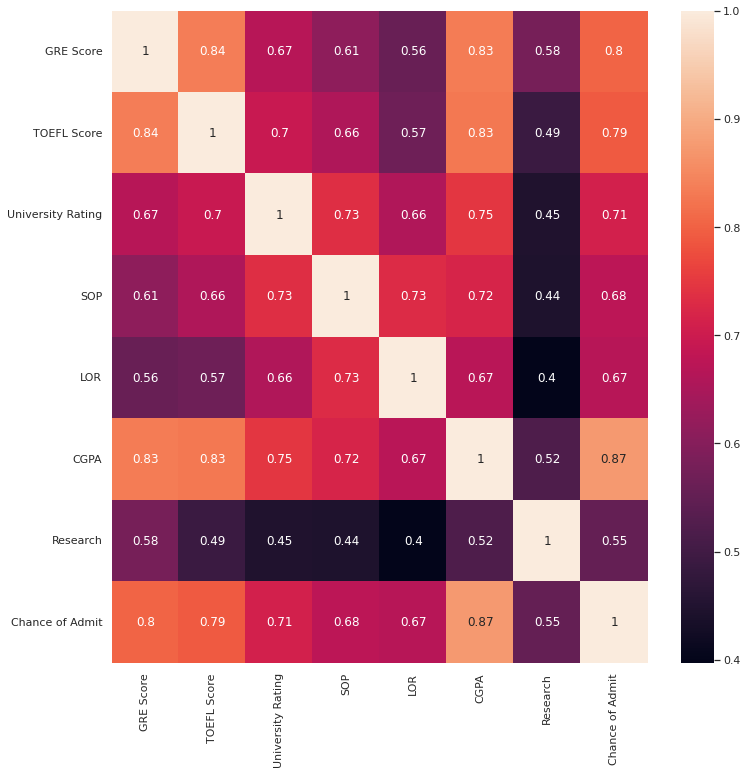

In [29]:
corr_matrix=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

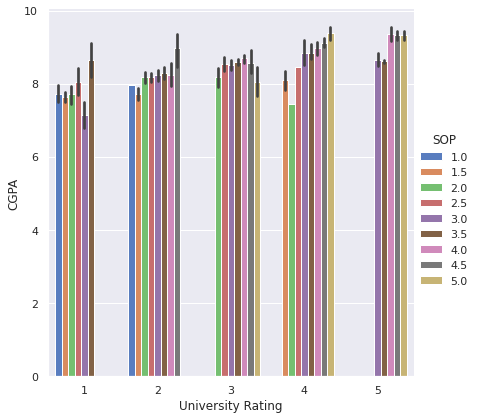

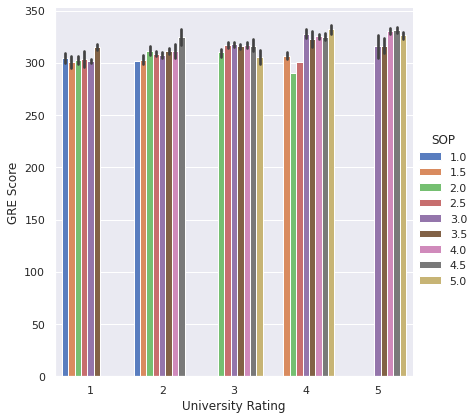

In [30]:
sns.catplot(x='University Rating',y='CGPA',hue='SOP',data=df,height=6,kind='bar',palette='muted')
sns.catplot(x='University Rating',y='GRE Score',hue='SOP',data=df,height=6,kind='bar',palette='muted')

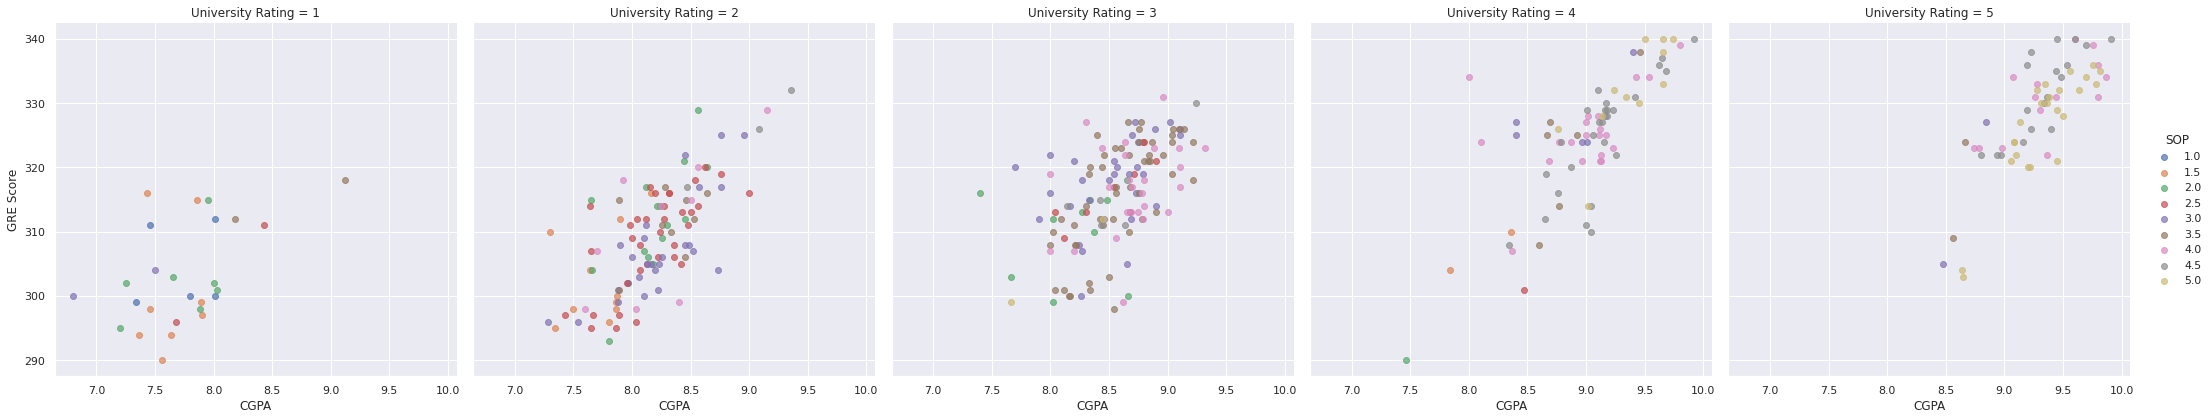

In [32]:
g=sns.FacetGrid(df,col='University Rating',hue='SOP',height=6)
g.map(plt.scatter,'CGPA','GRE Score',alpha=.7)
g.add_legend();

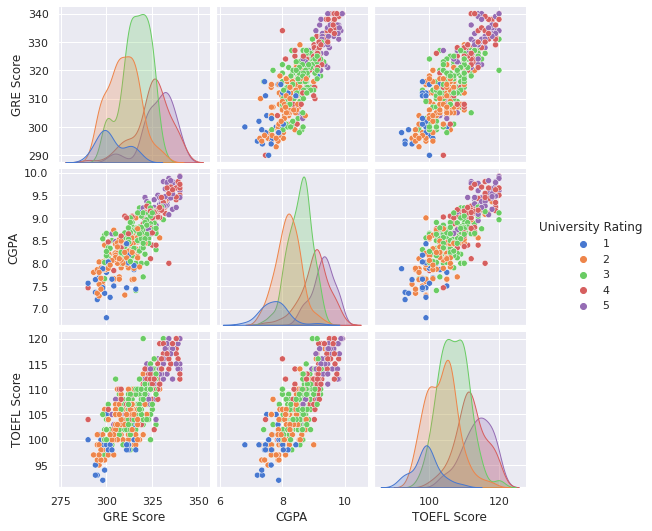

In [33]:
sns.pairplot(df,hue='University Rating',palette='muted',x_vars=['GRE Score','CGPA','TOEFL Score'],y_vars=['GRE Score','CGPA','TOEFL Score'])

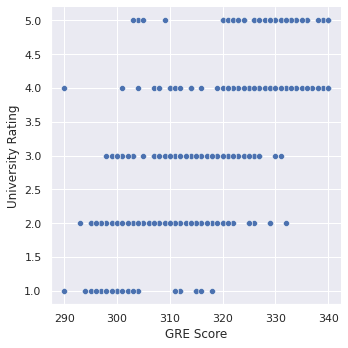

In [35]:
sns.relplot(x='GRE Score',y='University Rating',data=df)

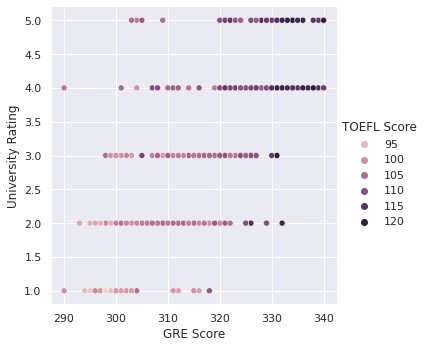

In [36]:
sns.relplot(x='GRE Score',y='University Rating',hue='TOEFL Score',data=df)

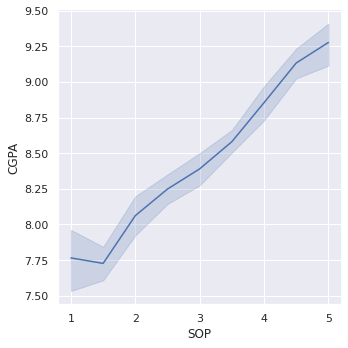

In [37]:
sns.relplot(x='SOP',y='CGPA',data=df,kind='line')

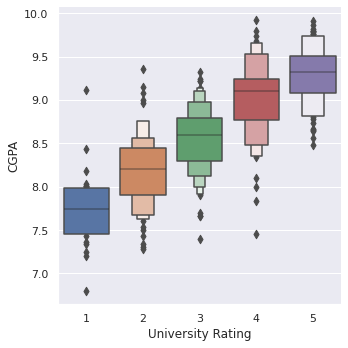

In [38]:
sns.catplot(y='CGPA',x='University Rating',kind='boxen',data=df)

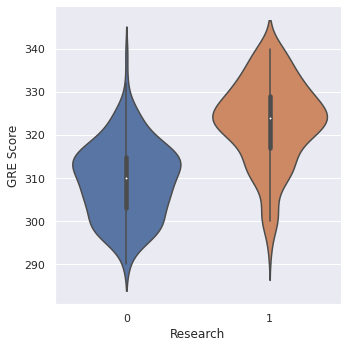

In [39]:
sns.catplot(y='GRE Score',x='Research',kind='violin',data=df)

In [40]:
from scipy import stats

In [41]:
c=np.random.normal(loc=5,size=100,scale=2)

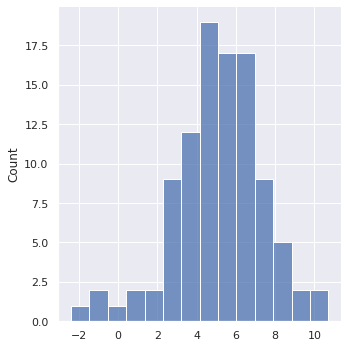

In [42]:
sns.displot(c)

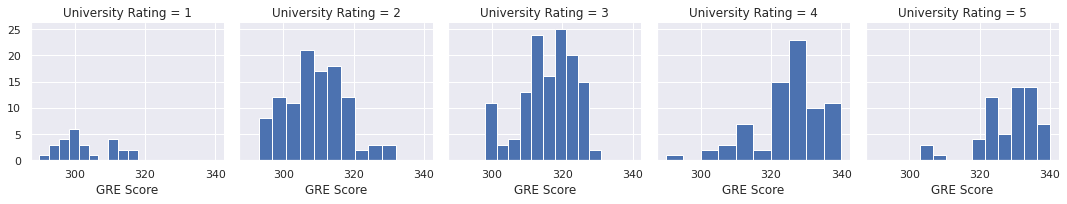

In [43]:
b=sns.FacetGrid(df,col='University Rating')
b.map(plt.hist,'GRE Score')

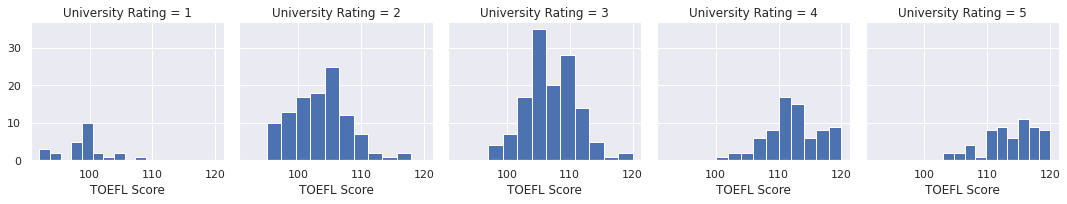

In [44]:
b=sns.FacetGrid(df,col='University Rating')
b.map(plt.hist,'TOEFL Score')

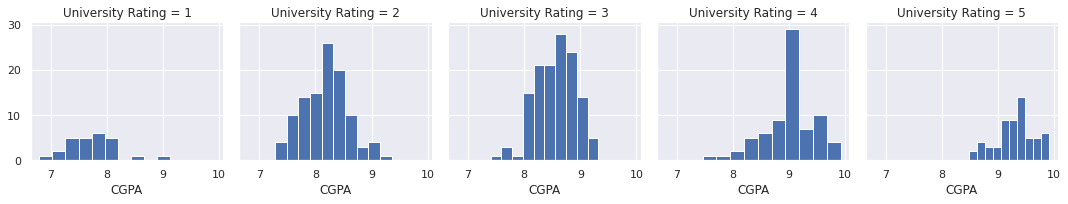

In [45]:
b=sns.FacetGrid(df,col='University Rating')
b.map(plt.hist,'CGPA')

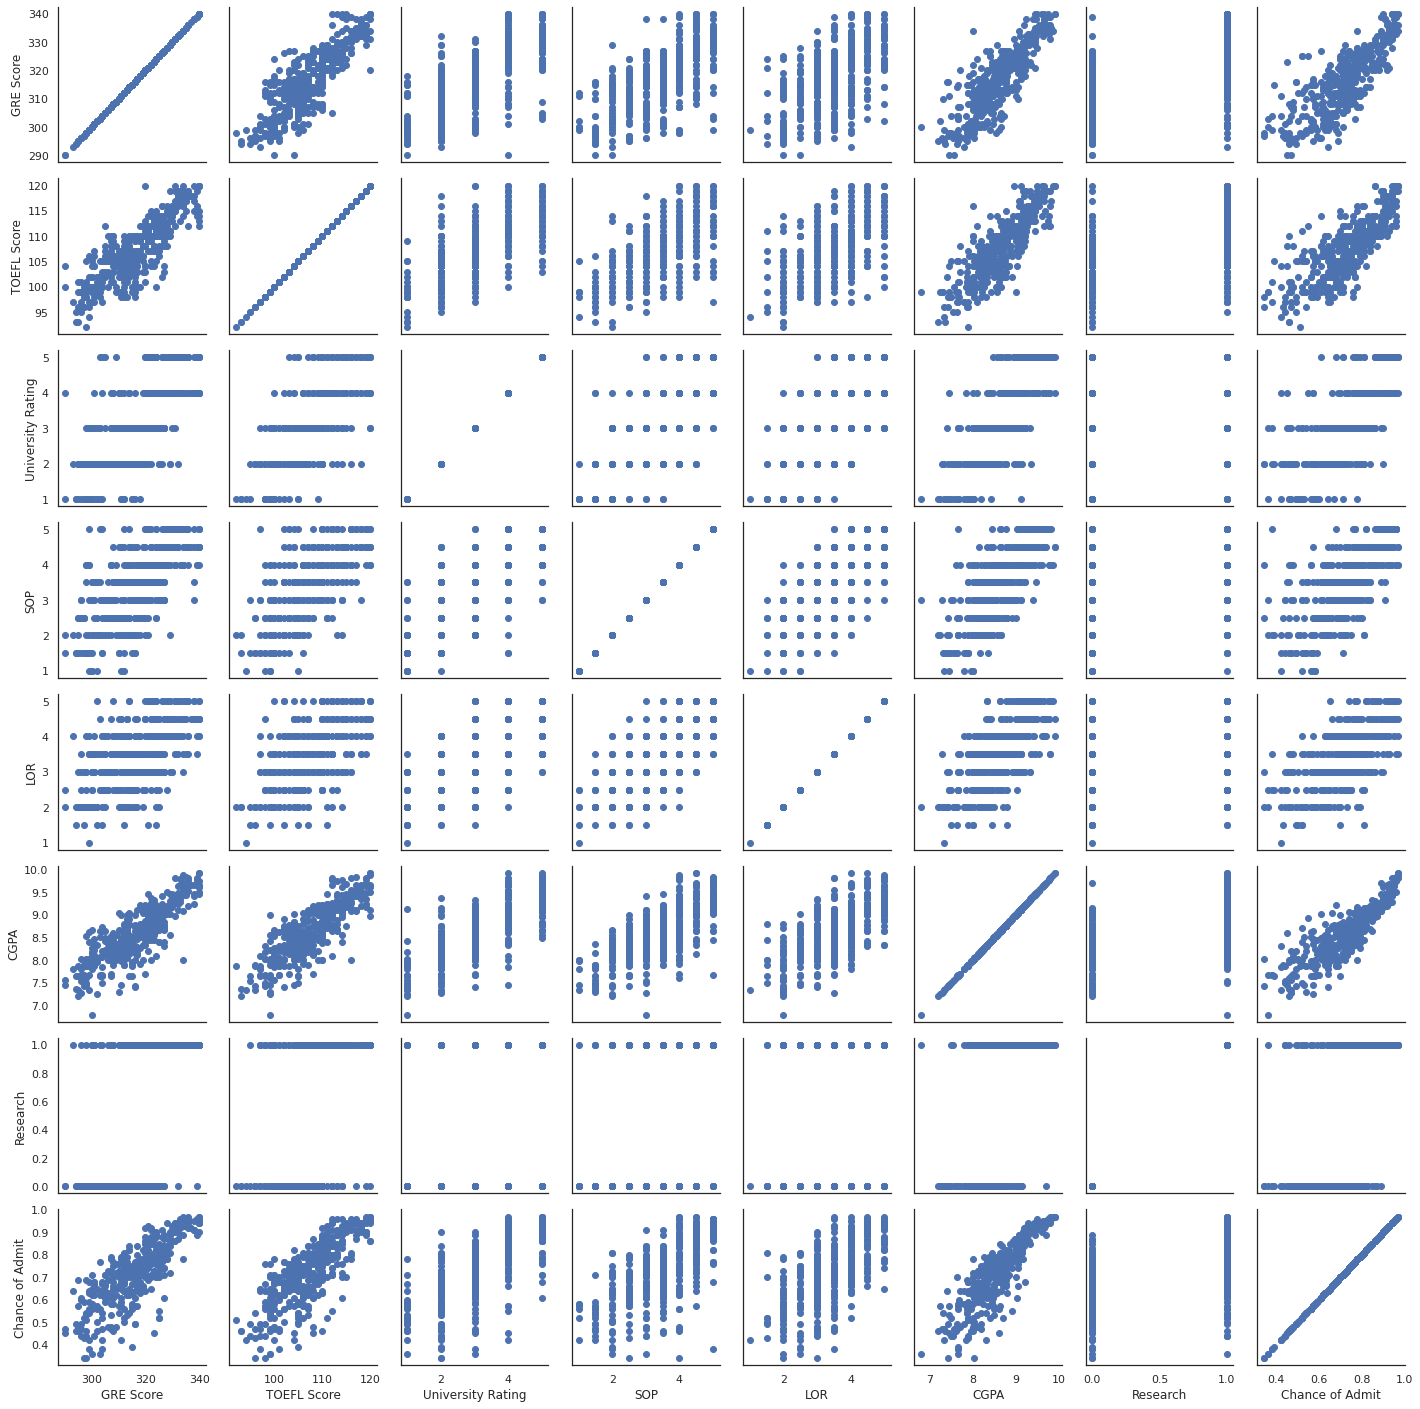

In [46]:
sns.set(style='white')
b=sns.PairGrid(df)
b.map(plt.scatter)

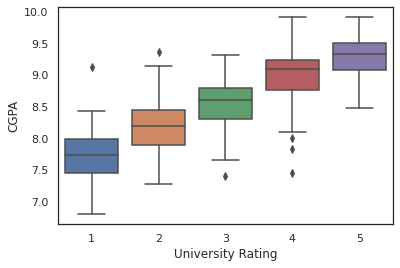

In [47]:
sns.set(style='white',color_codes=True)
sns.boxplot(x='University Rating',y='CGPA',data=df)

In [49]:
x=df.iloc[:,0:7].values

In [51]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [50]:
y=df.iloc[:,7:].values

In [52]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [53]:
x.shape

(400, 7)

In [54]:
y.shape

(400, 1)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
y_train=(y_train>0.5)

In [58]:
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [59]:
y_test=(y_test>0.5)

In [60]:
y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [61]:
import importlib.util
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


In [62]:
cls = LogisticRegression(random_state=0)

In [63]:
Ir=cls.fit(x_train,y_train)

In [64]:
y_pred = Ir.predict(x_test)

In [65]:
y_pred

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [66]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [70]:
print('\nAccuracy score: %f'%(accuracy_score(y_test,y_pred)*100))


Accuracy score: 91.250000


In [71]:
print('Recall score: %f' %(recall_score(y_test,y_pred)*100))

Recall score: 97.333333


In [72]:
print('ROC score: %f\n' %(roc_auc_score(y_test,y_pred)*100))

ROC score: 48.666667



In [73]:
print(confusion_matrix(y_test,y_pred))

[[ 0  5]
 [ 2 73]]


In [74]:
import sklearn
sklearn.__version__

'1.0.2'

In [75]:
x_train[0]

array([323.  , 107.  ,   3.  ,   3.5 ,   3.5 ,   8.55,   1.  ])

In [76]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')